### W&B Run Analysis in Jupyter Notebook

In [1]:
# Install if needed (run only once per environment)
# !pip install wandb pandas matplotlib seaborn

import wandb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options for wide DataFrames
pd.set_option('display.max_columns', 50)

#### Connect to W&B and Download Runs
Define project names:

In [2]:
# Define your project names (from the URLs)
project1 = "tkshfj-bsc-computer-science-university-of-london/baseline_cnn_2_conv_layers"
project2 = "tkshfj-bsc-computer-science-university-of-london/baseline_cnn_dropout_augmentation"

api = wandb.Api()

#### Download runs as DataFrames:

In [3]:
def fetch_runs_df(project):
    runs = api.runs(project)
    records = []
    for run in runs:
        summary = dict(run.summary)
        config = dict(run.config)
        # Remove W&B internal keys
        config = {k: v for k, v in config.items() if not k.startswith('_')}
        entry = {
            'run_id': run.id,
            'run_name': run.name,
            'state': run.state,
            **config,
            **summary
        }
        records.append(entry)
    return pd.DataFrame(records)

df1 = fetch_runs_df(project1)
df2 = fetch_runs_df(project2)

#### Preview the Results

In [4]:
# Show top metrics in each DataFrame
print("Project 1 shape:", df1.shape)
print("Project 2 shape:", df2.shape)
display(df1.head())
display(df2.head())

Project 1 shape: (1, 24)
Project 2 shape: (82, 28)


,run_id,run_name,state,epochs,optimizer,batch_size,architecture,learning_rate,_runtime,_step,_timestamp,_wandb,epoch/accuracy,epoch/auc,epoch/epoch,epoch/learning_rate,epoch/loss,epoch/precision,epoch/recall,epoch/val_accuracy,epoch/val_auc,epoch/val_loss,epoch/val_precision,epoch/val_recall
0,tleukzob,classic-surf-1,finished,20,Adam,8,shallow_cnn,0.0001,0.793954,12,1.749421e+09,{'runtime': 0},0.953,0.990232,12,0.0001,0.15237,0.936255,0.950647,0.728362,0.791855,0.714357,0.693727,0.608414


,run_id,run_name,state,epochs,dropout,filters,batch_size,kernel_size,learning_rate,_runtime,_step,_timestamp,_wandb,epoch/accuracy,epoch/auc,epoch/epoch,epoch/learning_rate,epoch/loss,epoch/precision,epoch/recall,epoch/val_accuracy,epoch/val_auc,epoch/val_loss,epoch/val_precision,epoch/val_recall,zoom,rotation,translation
0,h6zl7pfq,rural-sweep-1,finished,20,0.333958,64,32,5,0.000040,4444.800095,19,1.748770e+09,{'runtime': 4444},0.769667,0.848177,19,0.000040,0.486909,0.764820,0.636731,0.683089,0.730330,0.606858,0.647303,0.504854,NaN,NaN,NaN
1,luoi4yy0,rural-sweep-2,finished,20,0.450683,32,32,3,0.000940,1793.128857,7,1.748772e+09,{'runtime': 1792},0.862333,0.937513,7,0.000940,0.323911,0.851409,0.806634,0.675100,0.725153,0.686992,0.629482,0.511327,NaN,NaN,NaN
2,r0ilv59w,hopeful-sweep-3,finished,20,0.187177,32,8,5,0.000616,1869.906146,7,1.748774e+09,{'runtime': 1869},0.927000,0.975493,7,0.000616,0.203074,0.915781,0.906149,0.677763,0.733189,0.824701,0.625468,0.540453,NaN,NaN,NaN
3,ahf8fx73,fast-sweep-4,finished,20,0.414729,16,32,5,0.000563,2325.404881,9,1.748776e+09,{'runtime': 2325},0.807333,0.889933,9,0.000563,0.414788,0.786585,0.730583,0.669774,0.732146,0.647329,0.626556,0.488673,NaN,NaN,NaN
4,lvrd4eo0,comfy-sweep-5,finished,20,0.362670,16,32,5,0.000765,2045.902347,8,1.748778e+09,{'runtime': 2045},0.812000,0.897814,8,0.000765,0.402141,0.797872,0.728155,0.671105,0.713955,0.699310,0.596875,0.618123,NaN,NaN,NaN


#### Filter for Finished Runs & Key Metrics

In [6]:
metrics = ["epoch/val_accuracy", "epoch/val_loss", "epoch/val_auc", "epoch/val_precision", "epoch/val_recall"]

# Filter only finished runs
df1f = df1[df1['state'] == "finished"]
df2f = df2[df2['state'] == "finished"]

# Only keep runs with required metrics
df1f = df1f.dropna(subset=metrics)
df2f = df2f.dropna(subset=metrics)

#### Find the Best Runs

In [7]:
# Find best by highest val_auc (modify as needed)
best1 = df1f.loc[df1f['epoch/val_auc'].idxmax()]
best2 = df2f.loc[df2f['epoch/val_auc'].idxmax()]

print("Best Run (Project 1):", best1["run_name"], "\n", best1[metrics])
print("Best Run (Project 2):", best2["run_name"], "\n", best2[metrics])

Best Run (Project 1): classic-surf-1 
 epoch/val_accuracy     0.728362
epoch/val_loss         0.714357
epoch/val_auc          0.791855
epoch/val_precision    0.693727
epoch/val_recall       0.608414
Name: 0, dtype: object
Best Run (Project 2): misunderstood-sweep-13 
 epoch/val_accuracy     0.695073
epoch/val_loss         0.741272
epoch/val_auc          0.745815
epoch/val_precision     0.63986
epoch/val_recall       0.592233
Name: 12, dtype: object


#### Compare Best Runs Side by Side

In [8]:
# Combine best run results for a quick comparison
best_compare = pd.DataFrame([best1[metrics], best2[metrics]], 
                            index=["No Aug/Dropout", "With Aug/Dropout"])
display(best_compare.T)

,No Aug/Dropout,With Aug/Dropout
epoch/val_accuracy,0.728362,0.695073
epoch/val_loss,0.714357,0.741272
epoch/val_auc,0.791855,0.745815
epoch/val_precision,0.693727,0.639860
epoch/val_recall,0.608414,0.592233


#### Plot Hyperparameter Relationships

In [11]:
print(df1f.columns.tolist())

['run_id', 'run_name', 'state', 'epochs', 'optimizer', 'batch_size', 'architecture', 'learning_rate', '_runtime', '_step', '_timestamp', '_wandb', 'epoch/accuracy', 'epoch/auc', 'epoch/epoch', 'epoch/learning_rate', 'epoch/loss', 'epoch/precision', 'epoch/recall', 'epoch/val_accuracy', 'epoch/val_auc', 'epoch/val_loss', 'epoch/val_precision', 'epoch/val_recall']


#### Histogram of Validation AUC

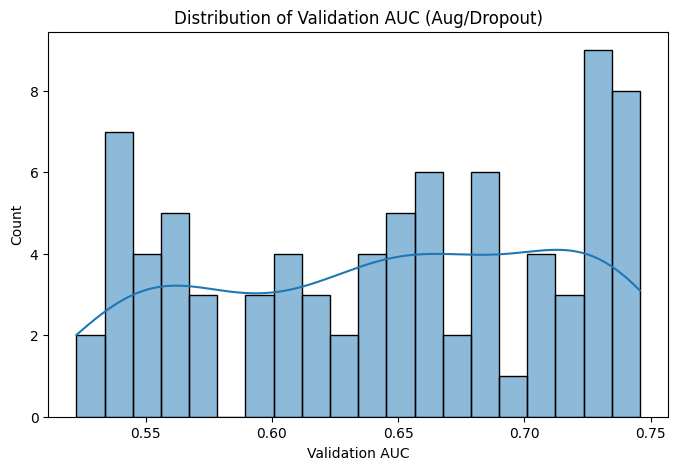

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df2f['epoch/val_auc'], bins=20, kde=True)
plt.title("Distribution of Validation AUC (Aug/Dropout)")
plt.xlabel("Validation AUC")
plt.ylabel("Count")
plt.show()

#### Scatterplot - Learning Rate vs. Validation AUC

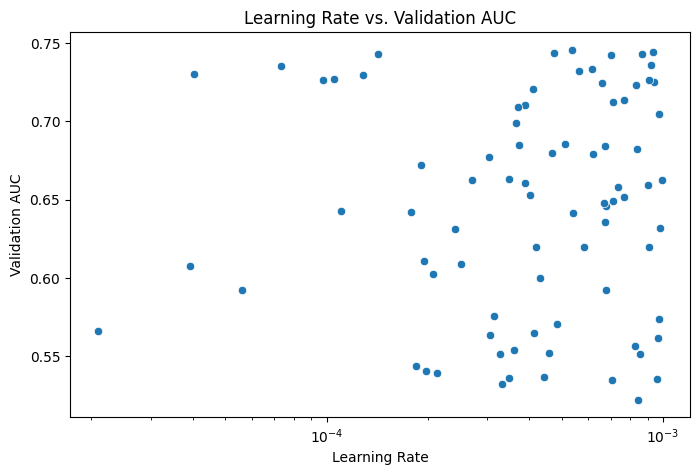

In [14]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df2f, x='learning_rate', y='epoch/val_auc')
plt.title("Learning Rate vs. Validation AUC")
plt.xlabel("Learning Rate")
plt.ylabel("Validation AUC")
plt.xscale('log')
plt.show()

#### Batch Size vs. Validation AUC

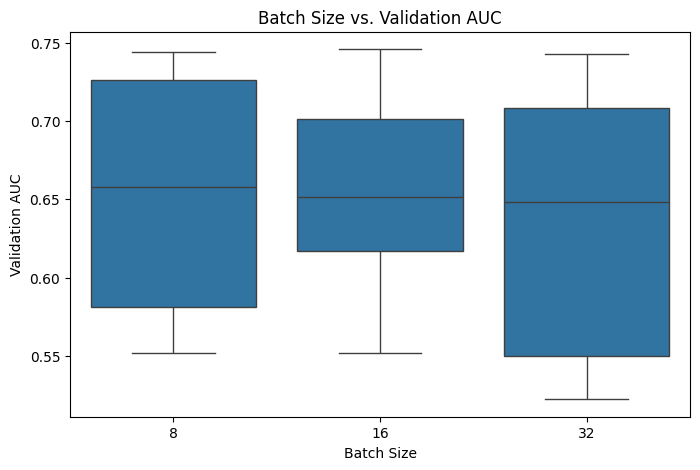

In [15]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df2f, x='batch_size', y='epoch/val_auc')
plt.title("Batch Size vs. Validation AUC")
plt.xlabel("Batch Size")
plt.ylabel("Validation AUC")
plt.show()

# W&B Project Analysis:

#### Import Libraries & Load Data

In [17]:
import wandb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

api = wandb.Api()
project = "tkshfj-bsc-computer-science-university-of-london/baseline_cnn_2_conv_layers"
runs = api.runs(project)

# Build DataFrame
records = []
for run in runs:
    summary = dict(run.summary)
    config = dict(run.config)
    config = {k: v for k, v in config.items() if not k.startswith('_')}
    entry = {
        'run_id': run.id,
        'run_name': run.name,
        'state': run.state,
        **config,
        **summary
    }
    records.append(entry)
df = pd.DataFrame(records)

In [18]:
print(df.shape)
print(df.columns)
display(df.head())

(1, 24)
Index(['run_id', 'run_name', 'state', 'epochs', 'optimizer', 'batch_size',
       'architecture', 'learning_rate', '_runtime', '_step', '_timestamp',
       '_wandb', 'epoch/accuracy', 'epoch/auc', 'epoch/epoch',
       'epoch/learning_rate', 'epoch/loss', 'epoch/precision', 'epoch/recall',
       'epoch/val_accuracy', 'epoch/val_auc', 'epoch/val_loss',
       'epoch/val_precision', 'epoch/val_recall'],
      dtype='object')


,run_id,run_name,state,epochs,optimizer,batch_size,architecture,learning_rate,_runtime,_step,_timestamp,_wandb,epoch/accuracy,epoch/auc,epoch/epoch,epoch/learning_rate,epoch/loss,epoch/precision,epoch/recall,epoch/val_accuracy,epoch/val_auc,epoch/val_loss,epoch/val_precision,epoch/val_recall
0,tleukzob,classic-surf-1,finished,20,Adam,8,shallow_cnn,0.0001,0.793954,12,1.749421e+09,{'runtime': 0},0.953,0.990232,12,0.0001,0.15237,0.936255,0.950647,0.728362,0.791855,0.714357,0.693727,0.608414


In [19]:
# Keep only finished runs with metrics present
metrics = [
    'epoch/val_accuracy', 'epoch/val_auc', 'epoch/val_loss', 
    'epoch/val_precision', 'epoch/val_recall'
]
df = df[df['state'] == 'finished']
df = df.dropna(subset=metrics)
print(f"{len(df)} finished runs.")

1 finished runs.
